In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
import glob
sns.set()

In [95]:
all_df=glob.glob('Comments_data/*.csv')
print(all_df)

['Comments_data\\Youtube01-Psy.csv', 'Comments_data\\Youtube02-KatyPerry.csv', 'Comments_data\\Youtube03-LMFAO.csv', 'Comments_data\\Youtube04-Eminem.csv', 'Comments_data\\Youtube05-Shakira.csv']


In [96]:
all_data=[]
for i in all_df:
    all_data.append(pd.read_csv(i).drop(['COMMENT_ID','AUTHOR','DATE'],axis=1))

In [97]:
d=pd.concat(all_data,axis=0,ignore_index=True)
d.shape

(1956, 2)

In [98]:
d.isna().sum()

CONTENT    0
CLASS      0
dtype: int64

In [99]:
d.CLASS.value_counts()

CLASS
1    1005
0     951
Name: count, dtype: int64

In [100]:
inputs=d['CONTENT']
targets=d['CLASS']

x_train,x_test,y_train,y_test=train_test_split(inputs,targets,
                                               test_size=0.2,
                                               random_state=365,
                                               stratify=targets)

In [101]:
y_train.value_counts(normalize=True)

CLASS
1    0.514066
0    0.485934
Name: proportion, dtype: float64

In [102]:
y_test.value_counts(normalize=True)

CLASS
1    0.512755
0    0.487245
Name: proportion, dtype: float64

In [103]:
count_vector=CountVectorizer()

In [104]:
x_train_trans=count_vector.fit_transform(x_train).toarray()
x_test_trans=count_vector.transform(x_test)

In [105]:
x_train_trans.shape

(1564, 3814)

In [106]:
x_test_trans.shape

(392, 3814)

In [107]:
clf=MultinomialNB(class_prior=np.array([0.6,0.4]))
clf.fit(x_train_trans,y_train)

MultinomialNB(class_prior=array([0.6, 0.4]))

In [108]:
clf.get_params()

{'alpha': 1.0,
 'class_prior': array([0.6, 0.4]),
 'fit_prior': True,
 'force_alpha': 'warn'}

In [109]:
(clf.predict(x_test_trans)==y_test).sum()/y_test.shape[0]

0.951530612244898

In [110]:
predicted_outputs=clf.predict(x_test_trans)

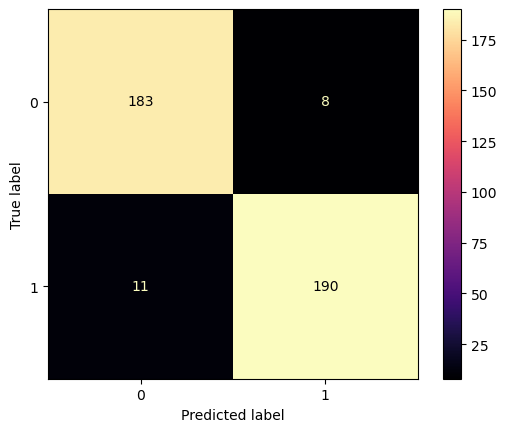

In [111]:
sns.reset_orig()
ConfusionMatrixDisplay.from_predictions(y_test,predicted_outputs,cmap='magma',labels=clf.classes_)
plt.show()

In [112]:
print(classification_report(y_test,predicted_outputs,target_names=['Ham','Spam']))

              precision    recall  f1-score   support

         Ham       0.94      0.96      0.95       191
        Spam       0.96      0.95      0.95       201

    accuracy                           0.95       392
   macro avg       0.95      0.95      0.95       392
weighted avg       0.95      0.95      0.95       392



In [113]:
predict_data=count_vector.transform(['This song is very soothing and enjoying',
                                    'Win 20$ every day with this wonderful app'])

In [114]:
clf.predict(predict_data)

array([0, 1], dtype=int64)

## Completed Naive Bayes Classifier with 95% Accuracy.